In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
from data_preprocess import read_image_tfds, get_training_dataset, get_validation_dataset

In [21]:
from box_creation import draw_bounding_box_on_image, draw_bounding_boxes_on_image_array, draw_bounding_box_on_image

In [3]:
training_dataset = get_training_dataset()

In [4]:
validation_dataset = get_validation_dataset()

In [5]:
batch_train_ds = training_dataset.unbatch().batch(5)

In [95]:
for digits, (labels, box) in batch_train_ds:
    train_dig = digits.numpy()
    labels = labels.numpy()
    box = box.numpy()
    break

Now actually plot some images from trianing and validation images

In [96]:
train_dig.shape

(5, 75, 75, 1)

In [97]:
indexes = np.random.choice(5, size=2)

In [98]:
indexes

array([4, 0])

In [99]:
image_trn = train_dig[indexes]

In [100]:
image_trn.shape

(2, 75, 75, 1)

In [101]:
image_trn = image_trn*255.0
image_trn.shape

(2, 75, 75, 1)

In [102]:
image_trn = image_trn.reshape(2,75,75)

In [103]:
image_trn.shape

(2, 75, 75)

In [105]:
im = image_trn[0]
im =im.astype(np.uint8)

In [106]:
type(im)

numpy.ndarray

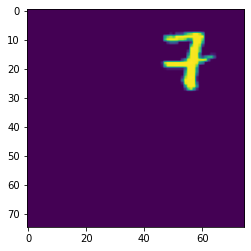

In [107]:
plt.imshow(im)

In [109]:
im_pl = Image.fromarray(im)

In [185]:
im_pl.size

(75, 75)

In [285]:
rgbimg = PIL.Image.new("RGBA",im_pl.size)

In [286]:
rgbimg.paste(im_pl)

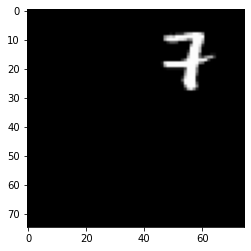

In [287]:
plt.imshow(rgbimg)

In [288]:
draw = PIL.ImageDraw.Draw(rgbimg)

In [289]:
im_width, im_height = rgbimg.size

In [290]:
n_bboxes = box[indexes,:]

In [291]:
n_bboxes.shape

(2, 4)

In [292]:
one_box= [n_bboxes[0]]

In [293]:
boxes = []
for i in n_bboxes:
    boxes.append(i)

In [294]:
boxes =np.asarray(boxes)

In [295]:
boxes[0,1]

0.026666667

In [296]:
ymin, xmin, ymax, xmax =boxes[0, 1], boxes[0, 0], boxes[0, 3], boxes[0, 2]

In [297]:
ymin,xmin, ymax, xmax

(0.026666667, 0.5466667, 0.4, 0.92)

In [298]:
 (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)

In [299]:
 (left, right, top, bottom) 

(41.00000113248825, 69.00000125169754, 2.000000048428774, 30.000000447034836)

In [300]:
  draw.line([(left, top), (left, bottom), (right, bottom),
             (right, top), (left, top)], width=1, fill='red')

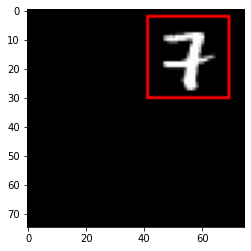

In [301]:
plt.imshow(rgbimg)

In [170]:
import PIL.Image

In [ ]:
# utility to display a row of digits with their predictions
def display_digits_with_boxes(digits, predictions, labels, pred_bboxes, bboxes, iou, title):

  n = 10

  indexes = np.random.choice(len(predictions), size=n)
  n_digits = digits[indexes]
  n_predictions = predictions[indexes]
  n_labels = labels[indexes]

  n_iou = []
  if len(iou) > 0:
    n_iou = iou[indexes]

  if (len(pred_bboxes) > 0):
    n_pred_bboxes = pred_bboxes[indexes,:]

  if (len(bboxes) > 0):
    n_bboxes = bboxes[indexes,:]
    n_digits = n_digits * 255.0
    n_digits = n_digits.reshape(n, 75, 75)
    fig = plt.figure(figsize=(20, 4))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])

    for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    bboxes_to_plot = []
    if (len(pred_bboxes) > i):
      bboxes_to_plot.append(n_pred_bboxes[i])

    if (len(bboxes) > i):
      bboxes_to_plot.append(n_bboxes[i])

    img_to_draw = draw_bounding_boxes_on_image_array(image=n_digits[i], boxes=np.asarray(bboxes_to_plot), color=['red', 'green'], display_str_list=["true", "pred"])
    plt.xlabel(n_predictions[i])
    plt.xticks([])
    plt.yticks([])

    if n_predictions[i] != n_labels[i]:
      ax.xaxis.label.set_color('red')



    plt.imshow(img_to_draw)

    if len(iou) > i :
      color = "black"
    if (n_iou[i][0] < iou
      color = "red"
    ax.text(0.2, -0.3, "iou: %s" %(n_iou[i][0]), color=color, transform=ax.transAxes)




In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
labels = np.argmax(labels, axis=1)

In [35]:
labels[0]

0

In [36]:
train_dig = train_dig.numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [37]:
img_=train_dig[0,1]

In [38]:
img_.shape

(75, 1)

<ipython-input-23-4797dd52132b>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1)


NameError: name 'bboxes_to_plot' is not defined

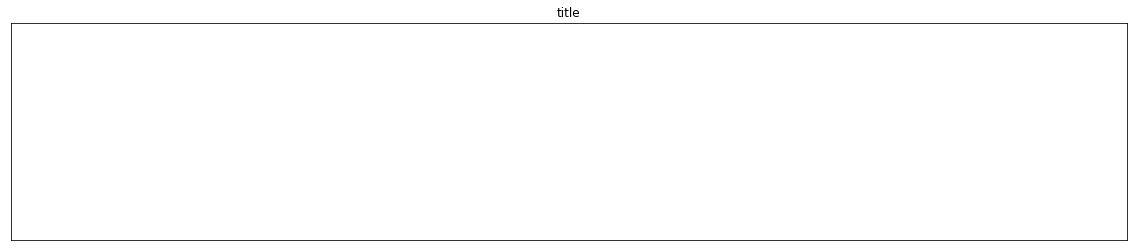

In [23]:
fig = plt.figure(figsize=(20, 4))
plt.title('title')
plt.yticks([])
plt.xticks([])
ax = fig.add_subplot(1, 1, 1)
img_to_draw = draw_bounding_boxes_on_image_array(image=digits[0], boxes=np.asarray(bboxes_to_plot), color=['red', 'green'], display_str_list=["true", "pred"])


In [27]:
PIL.Image.fromarray(img_)

TypeError: Cannot handle this data type: (1, 1, 75), <f4

In [26]:
import PIL
from PIL import Image